<a href="https://colab.research.google.com/github/aryadeo/NEURAL_NETWORK_BASICS/blob/master/Sigmoid_Neuron/APPLYING_SIMOID_TO_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tqdm import tqdm_notebook
import pandas as pd
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.colors

In [0]:
class Sigmoid_Neuron:
  def __init__(self):
    self.w=None
    self.b=None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b #we have taken the dot product of transpose of Weight matrix and the input vector just to avoid any size mismatch
  
  def sigmoid(self,x):
    return 1.0/(1+np.exp(-x))
  
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  
  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  
  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  
  def fit(self,X,Y,epochs=1,lr_rate=1,initialize=True, display_loss=False):
    if initialize:    #if initialization is required then we will proceed for this otherwise we will proceed with the previous value of w and b
      self.w=np.random.randn(1,X.shape[1])
      self.b=0

      # if display_loss:
      #   loss=[]
 
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -=lr_rate*dw
      self.b -=lr_rate*db

    #   if display_loss:
    #     y_pred=self.sigmoid(self.perceptron(x))
    #     loss.append(mean_squared_error(y_pred,y))
      
    # if display_loss:
    #   plt.plot(np.array(loss))
    #   plt.xlabel('epochs')
    #   plt.ylabel('mean_squared_error')
    #   plt.show()

Let's define the truth table of the XOR gate

In [0]:
X=np.asarray([[0,0], [0,1], [1,0], [1,1]])
Y=[0,1,1,0]

In [26]:
sn=Sigmoid_Neuron()#instantization of the class
sn.fit(X,Y,100,0.02,True,True)

In [0]:
#instead of running it for twenty epochs we are declaring the epochs from an outer for loop.
for i in range(20):
  sn.fit(X,Y,1,0.1,False)#as the initialzation is done previously, ther eis no need for reinitialization. So the intialize is stated 'False'
  print(sn.w,sn.b)


In [0]:
cmap_test = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","blue"])

In [0]:
def plot_sigmoid(X,Y,sn):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  X1_g,X2_g=np.meshgrid(X1,X2)
  Y1_g=np.zeros(X1_g.shape)
  for i in range(X1.size):
    for j in range(X2.size):
      val=np.asarray([X2[j],X1[i]])#This altering indexing is important!!!!.......x coordinate is X2[j] and y coordinate is X1[i]
      Y1_g[i,j]=sn.sigmoid(sn.perceptron(val))
  plt.contourf(X1_g,X2_g,Y1_g,cmap=cmap_test,alpha=0.6)
  plt.scatter(X[:,0],X[:,1],c=Y,cmap=cmap_test)#X[:,0] implies all row of 1st column
  plt.plot()
  plt.show()

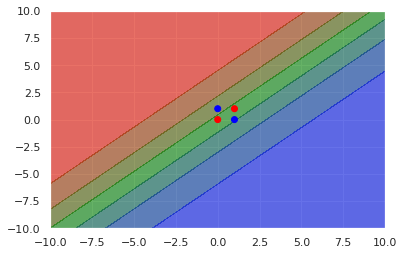

In [30]:
  plot_sigmoid(X,Y,sn)#We are just calling the class for plotting....its just for testing

In [0]:
def plot_sigmoid(X,Y,sn,ax):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  X1_g,X2_g=np.meshgrid(X1,X2)
  Y1_g=np.zeros(X1_g.shape)
  for i in range(X1.size):
    for j in range(X2.size):
      val=np.asarray([X2[j],X1[i]])
      Y1_g[i,j]=sn.sigmoid(sn.perceptron(val))
  ax.contourf(X1_g,X2_g,Y1_g,cmap=cmap_test,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=cmap_test)#X[:,0] implies all row of 1st column
  ax.plot()
  return Y1_g
  # ax.show()

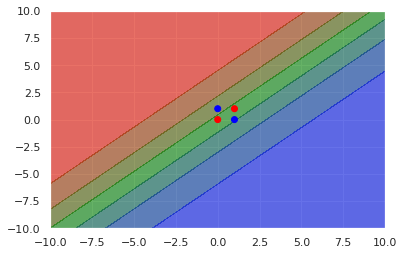

In [33]:
ax=plt.subplot()
Y1_g_test=plot_sigmoid(X,Y,sn,ax)


[[0.68408072 0.6141131 ]] [-0.06256743]



[[0.65062916 0.58385777]] [-0.11774343]



[[0.61836089 0.5546718 ]] [-0.16555764]



[[0.58766071 0.52690953]] [-0.20624144]



[[0.55880584 0.50083095]] [-0.2401962]



[[0.53195774 0.47659154]] [-0.26795168]



[[0.50716977 0.45424716]] [-0.29011987]



[[0.4844058 0.4337698]] [-0.30735055]



[[0.4635639  0.41506886]] [-0.32029328]



[[0.44449997 0.39801291]] [-0.32956867]



[[0.42704808 0.38244872]] [-0.33574924]



[[0.41103598 0.36821608]] [-0.33934901]



[[0.39629595 0.35515815]] [-0.34081962]



[[0.38267151 0.34312809]] [-0.34055125]



[[0.37002099 0.33199265]] [-0.33887643]



[[0.358219   0.32163363]] [-0.33607547]



[[0.34715627 0.31194797]] [-0.33238255]



[[0.33673882 0.30284694]] [-0.32799182]



[[0.32688649 0.29425494]] [-0.32306326]



[[0.3175314  0.28610794]] [-0.31772793]



[[0.30861632 0.2783521 ]] [-0.31209265]



[[0.30009315 0.27094224]] [-0.30624411]



[[0.29192151 0.26384057]] [-0.30025231]



[[0.28406754 0.25701549]] [-0.29417354]



[[0.2765028 0.2504406]] [-0.28805285]



[[0.26920332 0.24409379]] [-0.28192614]



[[0.26214888 0.23795651]] [-0.27582181]



[[0.25532231 0.23201313]] [-0.26976222]



[[0.24870895 0.22625044]] [-0.26376483]



[[0.24229623 0.22065716]] [-0.25784316]



[[0.23607325 0.21522366]] [-0.25200752]



[[0.23003051 0.20994161]] [-0.24626568]



[[0.22415964 0.20480373]] [-0.24062334]



[[0.21845321 0.19980366]] [-0.23508459]



[[0.21290456 0.19493573]] [-0.22965218]



[[0.20750767 0.19019487]] [-0.22432784]



[[0.20225703 0.18557649]] [-0.21911245]



[[0.19714759 0.18107639]] [-0.21400626]



[[0.19217465 0.17669074]] [-0.20900898]



[[0.18733384 0.17241595]] [-0.20411994]


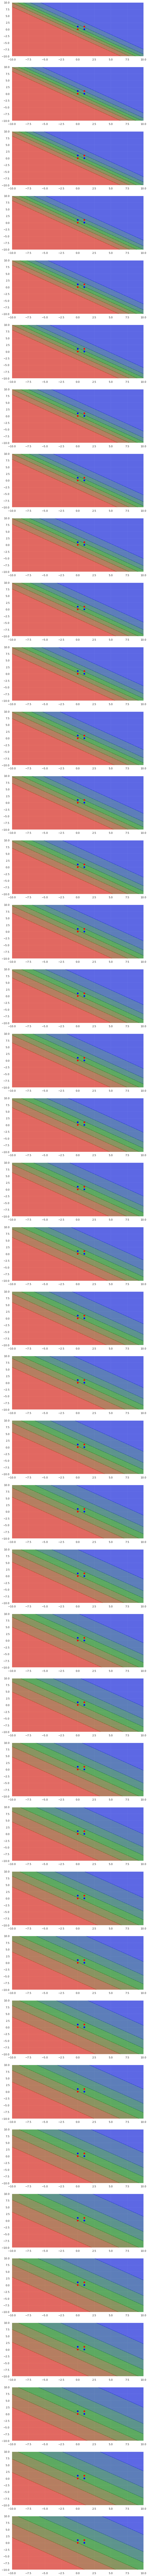

In [34]:
sn.fit(X,Y,1,0.6,True)
num_epochs=40
plt.figure(figsize=(10,num_epochs*5))
Y1_g_all=[]#reqquired for storing the predicted output of each apoch
for i in range(num_epochs):
  Y1_g_test=[]
  print(sn.w,sn.b)
  ax=plt.subplot(num_epochs,1,i+1)
  Y1_g_test=plot_sigmoid(X,Y,sn,ax)
  sn.fit(X,Y,1,0.6,False)
  Y1_g_all.append(Y1_g_test)
Y1_g_all=np.asarray(Y1_g_all)#just to go safe we are converting the list into an array

In [0]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
X1_g,X2_g=np.meshgrid(X1,X2)
# Y=sigmoid_3D_test(X1_g,X2_g,0.5,0.5,0)


In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

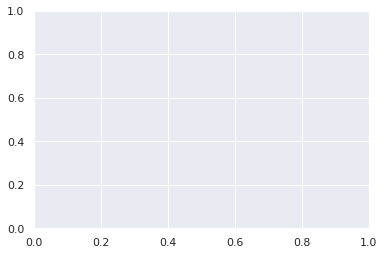

In [48]:
fig,ax = plt.subplots()

In [0]:
def animate(i):
       ax.clear()
       ax.contourf(X1_g,X2_g,Y1_g_all[i][:,:],cmap=cmap_test,alpha=0.6)
       ax.scatter(X[:,0],X[:,1],c=Y,cmap=cmap_test)
       ax.set_title('%03d'%(i+1)) 

In [0]:
ani = animation.FuncAnimation(fig,animate,frames=num_epochs,interval=1000,blit=False)

In [51]:
HTML(ani.to_html5_video())

Here we can see that a single sigmoid neuron is unable to classify the XOR gate